In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
# DATA PATHS

TRAIN_FOLDER_PATH = '../../data/train/'
VAL_FODLER_PATH = '../../data/validation/'
TEST_FOLDER_PATH = '../../data/test/'
PREVIEW_IMAGES_FOLDER = '../../data/preview/'

In [3]:
# Model name used to save the weights in h5 format. The name match with the Jupyter notebook

MODEL_NAME = 'model_1'

In [28]:
# Data augmentation

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

img = load_img(os.path.join(TRAIN_FOLDER_PATH, 'parasitized/cell_1.png'))

x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir=PREVIEW_IMAGES_FOLDER, save_prefix='cell', save_format='png'):
    i+=1
    if i > 5:
        break

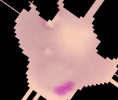

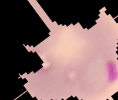

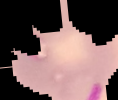

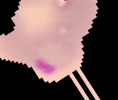

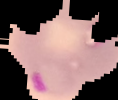

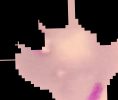

In [29]:
from IPython.display import Image, display

for r, d, f in os.walk(PREVIEW_IMAGES_FOLDER):
    for image in f:
        display(Image(os.path.join(r, image)))

In [4]:
# Import the architecture/s we want to use and then get the model

import architecture_1

arc1 = architecture_1

model = arc1.get_model()

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [5]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [7]:
# MODEL TRAINING CONFIGURATION

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_FOLDER_PATH,
    target_size = (100,100),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_FODLER_PATH,
    target_size = (100, 100),
    batch_size = batch_size,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    TEST_FOLDER_PATH,
    target_size = (100, 100),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 2754 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 274 images belonging to 2 classes.


In [8]:
print("Images in train dataset: {}".format(train_generator.n))
print("Images in validation dataset: {}".format(validation_generator.n))
print("Images in test dataset: {}".format(test_generator.n))

Images in train dataset: 2754
Images in validation dataset: 550
Images in test dataset: 274


In [9]:
# MODEL TRAINING

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.n // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = validation_generator.n // batch_size,
    use_multiprocessing = True
)

model.save_weights(MODEL_NAME + '.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
86/86 [==============================] - 14s 165ms/step - loss: 0.6970 - acc: 0.4851 - val_loss: 0.6923 - val_acc: 0.5037
Epoch 2/20
86/86 [==============================] - 13s 153ms/step - loss: 0.6903 - acc: 0.5331 - val_loss: 0.6898 - val_acc: 0.4981
Epoch 3/20
86/86 [==============================] - 13s 153ms/step - loss: 0.6858 - acc: 0.5538 - val_loss: 0.6860 - val_acc: 0.5270
Epoch 4/20
86/86 [==============================] - 13s 154ms/step - loss: 0.6796 - acc: 0.5749 - val_loss: 0.6715 - val_acc: 0.6081
Epoch 5/20
86/86 [==============================] - 13s 156ms/step - loss: 0.6618 - acc: 0.6170 - val_loss: 0.6498 - val_acc: 0.6197
Epoch 6/20
86/86 [==============================] - 13s 154ms/step - loss: 0.6521 - acc: 0.6218 - val_loss: 0.6258 - val_acc: 0.6583
Epoch 7/20
86/86 [==============================] - 13s 154ms/step - loss: 0.6491 - acc: 0.6388 - val_loss: 0.6051 - val_acc: 0.6931
Epoch 8/20
86/86 [===

In [10]:
history